# Accidents corporels de la circulation routière (ACCR) en France

Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit « Fichier BAAC » administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
HERE = Path.cwd().parent.parent
DATASET_PATH = HERE / 'dataset'
DATASET_PATH

PosixPath('/home/goamegah/Documents/workspace/develop/esgi/s1/hackaton/automl-road-accident-gravity/dataset')

In [3]:
import sys
sys.path.append(str(HERE))

## Dataset 

In [4]:
caracteristiques = pd.read_csv(
    f'{DATASET_PATH}/caract-2023.csv',
    sep=';',
)

lieux = pd.read_csv(
    f'{DATASET_PATH}/lieux-2023.csv', 
    sep=';',
    dtype={'lartpc': str}
)
vehicules = pd.read_csv(
    f'{DATASET_PATH}/vehicules-2023.csv',
    sep=';'
    )

usagers = pd.read_csv(
    f'{DATASET_PATH}/usagers-2023.csv',
    sep=';'
    )

In [5]:
print(caracteristiques.shape)
caracteristiques.head()

(54822, 15)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [6]:
print(vehicules.shape)
vehicules.head()

(93585, 11)


,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [7]:
print(usagers.shape)
usagers.head()

(125789, 16)


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [8]:
print(lieux.shape)
lieux.head()

(70860, 18)


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


## Data modeling

In [9]:
caract_lieux = pd.merge(caracteristiques, lieux, on='Num_Acc', how='inner')
caract_lieux_veh = pd.merge(caract_lieux, vehicules, on='Num_Acc', how='inner')
merged_df = pd.merge(caract_lieux_veh, usagers, on=['Num_Acc', 'id_vehicule'], how='inner')

print(merged_df.shape)
merged_df.head()

(163683, 56)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,4,1,1978.0,5,2,0,-1,-1,-1,-1
2,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,1,2,1997.0,9,1,0,-1,-1,-1,-1
3,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,3,1,1997.0,9,0,-1,-1,2,3,1
4,202300000003,7,5,2023,20:50,1,94,94022,2,3,...,3,1,1987.0,0,2,6,0,0,0,-1


In [10]:
merged_df.dtypes

Num_Acc          int64
jour             int64
mois             int64
an               int64
hrmn            object
lum              int64
dep             object
com             object
agg              int64
int              int64
atm              int64
col              int64
adr             object
lat             object
long            object
catr             int64
voie            object
v1               int64
v2              object
circ             int64
nbv             object
vosp             int64
prof             int64
pr              object
pr1             object
plan             int64
lartpc          object
larrout         object
surf             int64
infra            int64
situ             int64
vma              int64
id_vehicule     object
num_veh_x       object
senc             int64
catv             int64
obs              int64
obsm             int64
choc             int64
manv             int64
motor            int64
occutc         float64
id_usager       object
num_veh_y  

## Traitement des données

In [101]:
from accr.data.feature_selection import Processing

processing = Processing()

In [102]:
transformed_df = merged_df.copy()

In [103]:
transformed_df.grav.value_counts(dropna=False)

grav
 1    70862
 4    64927
 3    23857
 2     3881
-1      156
Name: count, dtype: int64

In [104]:
np.unique(merged_df.nbv.tolist())

array([' -1', '#VALEURMULTI', '0', '1', '10', '11', '12', '2', '3', '4',
       '5', '6', '7', '8', '9'], dtype='<U12')

In [105]:
# remplacer les valeurs vides, -1, 0, (.) par np.nan
transformed_df = processing.replace_missing_values(transformed_df)

In [106]:
transformed_df.grav.value_counts(dropna=False)

grav
1.0    70862
4.0    64927
3.0    23857
2.0     3881
NaN      156
Name: count, dtype: int64

In [107]:
transformed_df.grav.unique()

array([ 4.,  1.,  3.,  2., nan])

In [108]:
transformed_df = processing.preprocessing_utils.dropna(subset=['grav'], df=transformed_df)
print(transformed_df.shape)
transformed_df.head()

(163527, 56)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,7,5,2023,06:00,1.0,75,75101,2,4.0,...,4.0,1.0,1978.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
1,202300000001,7,5,2023,06:00,1.0,75,75101,2,4.0,...,4.0,1.0,1978.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
2,202300000002,7,5,2023,05:30,5.0,94,94080,2,1.0,...,1.0,2.0,1997.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN
3,202300000002,7,5,2023,05:30,5.0,94,94080,2,1.0,...,3.0,1.0,1997.0,9.0,NaN,NaN,NaN,2.0,3,1.0
4,202300000003,7,5,2023,20:50,1.0,94,94022,2,3.0,...,3.0,1.0,1987.0,NaN,2.0,6.0,NaN,NaN,NaN,NaN


In [109]:
processing.summary(transformed_df)

{'Total Columns': 56,
 'Total Rows': 163527,
 'Numerical Columns': ['Num_Acc',
  'jour',
  'mois',
  'an',
  'lum',
  'agg',
  'int',
  'atm',
  'col',
  'catr',
  'v1',
  'circ',
  'vosp',
  'prof',
  'plan',
  'surf',
  'infra',
  'situ',
  'vma',
  'senc',
  'catv',
  'obs',
  'obsm',
  'choc',
  'manv',
  'motor',
  'occutc',
  'place',
  'catu',
  'grav',
  'sexe',
  'an_nais',
  'trajet',
  'secu1',
  'secu2',
  'secu3',
  'locp',
  'etatp'],
 'Categorical Columns': ['hrmn',
  'dep',
  'com',
  'adr',
  'lat',
  'long',
  'voie',
  'v2',
  'nbv',
  'pr',
  'pr1',
  'lartpc',
  'larrout',
  'id_vehicule',
  'num_veh_x',
  'id_usager',
  'num_veh_y',
  'actp'],
 'Missing Values': {'Num_Acc': 0,
  'jour': 0,
  'mois': 0,
  'an': 0,
  'hrmn': 0,
  'lum': 3,
  'dep': 0,
  'com': 0,
  'agg': 0,
  'int': 10,
  'atm': 7,
  'col': 28,
  'adr': 4049,
  'lat': 0,
  'long': 0,
  'catr': 0,
  'voie': 28572,
  'v1': 163306,
  'v2': 149904,
  'circ': 11230,
  'nbv': 14295,
  'vosp': 143089,
  '

In [110]:
categorical_cols_to_exclude = ['v2', 'adr', 'id_usager', 'id_vehicule', 'num_veh_y', 'lat', 'long', 'actp',
                               'larrout', 'lartpc', 'hrmn', 'dep', 'com', 'voie', 'pr', 'pr1', "num_veh_x"]

In [111]:
transformed_df = transformed_df.drop(columns=categorical_cols_to_exclude)

In [112]:
processing.summary(transformed_df)

{'Total Columns': 39,
 'Total Rows': 163527,
 'Numerical Columns': ['Num_Acc',
  'jour',
  'mois',
  'an',
  'lum',
  'agg',
  'int',
  'atm',
  'col',
  'catr',
  'v1',
  'circ',
  'vosp',
  'prof',
  'plan',
  'surf',
  'infra',
  'situ',
  'vma',
  'senc',
  'catv',
  'obs',
  'obsm',
  'choc',
  'manv',
  'motor',
  'occutc',
  'place',
  'catu',
  'grav',
  'sexe',
  'an_nais',
  'trajet',
  'secu1',
  'secu2',
  'secu3',
  'locp',
  'etatp'],
 'Categorical Columns': ['nbv'],
 'Missing Values': {'Num_Acc': 0,
  'jour': 0,
  'mois': 0,
  'an': 0,
  'lum': 3,
  'agg': 0,
  'int': 10,
  'atm': 7,
  'col': 28,
  'catr': 0,
  'v1': 163306,
  'circ': 11230,
  'nbv': 14295,
  'vosp': 143089,
  'prof': 515,
  'plan': 396,
  'surf': 502,
  'infra': 137903,
  'situ': 476,
  'vma': 10346,
  'senc': 9367,
  'catv': 424,
  'obs': 139844,
  'obsm': 28336,
  'choc': 9217,
  'manv': 9888,
  'motor': 13347,
  'occutc': 160805,
  'place': 2,
  'catu': 0,
  'grav': 0,
  'sexe': 3123,
  'an_nais': 33

In [113]:
np.unique(transformed_df.nbv.tolist())

array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9',
       'nan'], dtype='<U32')

In [114]:
print(transformed_df.shape)
transformed_df.head()

(163527, 39)


,Num_Acc,jour,mois,an,lum,agg,int,atm,col,catr,...,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
0,202300000001,7,5,2023,1.0,2,4.0,2.0,7.0,4,...,1,4.0,1.0,1978.0,5.0,2.0,NaN,NaN,NaN,NaN
1,202300000001,7,5,2023,1.0,2,4.0,2.0,7.0,4,...,1,4.0,1.0,1978.0,5.0,2.0,NaN,NaN,NaN,NaN
2,202300000002,7,5,2023,5.0,2,1.0,3.0,6.0,3,...,1,1.0,2.0,1997.0,9.0,1.0,NaN,NaN,NaN,NaN
3,202300000002,7,5,2023,5.0,2,1.0,3.0,6.0,3,...,3,3.0,1.0,1997.0,9.0,NaN,NaN,NaN,2.0,1.0
4,202300000003,7,5,2023,1.0,2,3.0,2.0,1.0,3,...,1,3.0,1.0,1987.0,NaN,2.0,6.0,NaN,NaN,NaN


In [115]:
np.unique(transformed_df.place)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [116]:
np.unique(transformed_df.catv)

array([ 1.,  2.,  3.,  7., 10., 13., 14., 15., 16., 17., 20., 21., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       50., 60., 80., 99., nan])

In [117]:
transformed_df.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'lum', 'agg', 'int', 'atm', 'col',
       'catr', 'v1', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra',
       'situ', 'vma', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor',
       'occutc', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1',
       'secu2', 'secu3', 'locp', 'etatp'],
      dtype='object')

In [118]:
numerical_vars_to_categorical_vars = ["catr", "col", "atm", "catr", "circ", "vosp", "prof", 
                                      "plan", "surf", "trajet", "locp", "etatp", #place
                                      "infra", "situ", "obsm", "choc", "senc", #obs, #catv
                                      "motor", "catu", "secu1", "secu2"] #manv
ordinal_vars = ["catv"]

In [119]:
processing.summary(transformed_df)

{'Total Columns': 39,
 'Total Rows': 163527,
 'Numerical Columns': ['Num_Acc',
  'jour',
  'mois',
  'an',
  'lum',
  'agg',
  'int',
  'atm',
  'col',
  'catr',
  'v1',
  'circ',
  'vosp',
  'prof',
  'plan',
  'surf',
  'infra',
  'situ',
  'vma',
  'senc',
  'catv',
  'obs',
  'obsm',
  'choc',
  'manv',
  'motor',
  'occutc',
  'place',
  'catu',
  'grav',
  'sexe',
  'an_nais',
  'trajet',
  'secu1',
  'secu2',
  'secu3',
  'locp',
  'etatp'],
 'Categorical Columns': ['nbv'],
 'Missing Values': {'Num_Acc': 0,
  'jour': 0,
  'mois': 0,
  'an': 0,
  'lum': 3,
  'agg': 0,
  'int': 10,
  'atm': 7,
  'col': 28,
  'catr': 0,
  'v1': 163306,
  'circ': 11230,
  'nbv': 14295,
  'vosp': 143089,
  'prof': 515,
  'plan': 396,
  'surf': 502,
  'infra': 137903,
  'situ': 476,
  'vma': 10346,
  'senc': 9367,
  'catv': 424,
  'obs': 139844,
  'obsm': 28336,
  'choc': 9217,
  'manv': 9888,
  'motor': 13347,
  'occutc': 160805,
  'place': 2,
  'catu': 0,
  'grav': 0,
  'sexe': 3123,
  'an_nais': 33

In [120]:
numerical_vars_to_exclude = ["Num_Acc", "jour", "mois", "an", "sexe", "an_nais", "v1", "occutc"] #v2

In [121]:
transformed_df = transformed_df.drop(columns=numerical_vars_to_exclude)
print(transformed_df.shape)
transformed_df

(163527, 31)


,lum,agg,int,atm,col,catr,circ,nbv,vosp,prof,...,motor,place,catu,grav,trajet,secu1,secu2,secu3,locp,etatp
0,1.0,2,4.0,2.0,7.0,4,1.0,2,NaN,1.0,...,1.0,1.0,1,4.0,5.0,2.0,NaN,NaN,NaN,NaN
1,1.0,2,4.0,2.0,7.0,4,1.0,1,NaN,1.0,...,1.0,1.0,1,4.0,5.0,2.0,NaN,NaN,NaN,NaN
2,5.0,2,1.0,3.0,6.0,3,2.0,3,2.0,1.0,...,1.0,1.0,1,1.0,9.0,1.0,NaN,NaN,NaN,NaN
3,5.0,2,1.0,3.0,6.0,3,2.0,3,2.0,1.0,...,1.0,10.0,3,3.0,9.0,NaN,NaN,NaN,2.0,1.0
4,1.0,2,3.0,2.0,1.0,3,2.0,4,NaN,1.0,...,1.0,1.0,1,3.0,NaN,2.0,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163678,1.0,1,6.0,1.0,3.0,2,NaN,2,1.0,1.0,...,1.0,1.0,1,4.0,1.0,2.0,NaN,NaN,NaN,NaN
163679,1.0,1,6.0,1.0,3.0,2,NaN,2,1.0,1.0,...,1.0,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
163680,1.0,2,1.0,6.0,3.0,4,2.0,2,2.0,1.0,...,1.0,2.0,2,1.0,2.0,1.0,NaN,NaN,NaN,NaN
163681,1.0,2,1.0,6.0,3.0,4,2.0,2,2.0,1.0,...,1.0,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [122]:
cleaned_df, col_to_remove = processing.drop_columns_with_missing(df=transformed_df, threshold_ratio=0.5)

In [123]:
processing.summary(cleaned_df)

{'Total Columns': 24,
 'Total Rows': 163527,
 'Numerical Columns': ['lum',
  'agg',
  'int',
  'atm',
  'col',
  'catr',
  'circ',
  'prof',
  'plan',
  'surf',
  'situ',
  'vma',
  'senc',
  'catv',
  'obsm',
  'choc',
  'manv',
  'motor',
  'place',
  'catu',
  'grav',
  'trajet',
  'secu1'],
 'Categorical Columns': ['nbv'],
 'Missing Values': {'lum': 3,
  'agg': 0,
  'int': 10,
  'atm': 7,
  'col': 28,
  'catr': 0,
  'circ': 11230,
  'nbv': 14295,
  'prof': 515,
  'plan': 396,
  'surf': 502,
  'situ': 476,
  'vma': 10346,
  'senc': 9367,
  'catv': 424,
  'obsm': 28336,
  'choc': 9217,
  'manv': 9888,
  'motor': 13347,
  'place': 2,
  'catu': 0,
  'grav': 0,
  'trajet': 46118,
  'secu1': 18025}}

In [124]:
filled_df = processing.impute_missing_values(cleaned_df)

In [125]:
filled_df.dtypes

lum       float64
agg         int64
int       float64
atm       float64
col       float64
catr        int64
circ      float64
nbv        object
prof      float64
plan      float64
surf      float64
situ      float64
vma       float64
senc      float64
catv      float64
obsm      float64
choc      float64
manv      float64
motor     float64
place     float64
catu        int64
grav      float64
trajet    float64
secu1     float64
dtype: object

In [126]:
processing.summary(filled_df)

{'Total Columns': 24,
 'Total Rows': 163527,
 'Numerical Columns': ['lum',
  'agg',
  'int',
  'atm',
  'col',
  'catr',
  'circ',
  'prof',
  'plan',
  'surf',
  'situ',
  'vma',
  'senc',
  'catv',
  'obsm',
  'choc',
  'manv',
  'motor',
  'place',
  'catu',
  'grav',
  'trajet',
  'secu1'],
 'Categorical Columns': ['nbv'],
 'Missing Values': {'lum': 0,
  'agg': 0,
  'int': 0,
  'atm': 0,
  'col': 0,
  'catr': 0,
  'circ': 0,
  'nbv': 0,
  'prof': 0,
  'plan': 0,
  'surf': 0,
  'situ': 0,
  'vma': 0,
  'senc': 0,
  'catv': 0,
  'obsm': 0,
  'choc': 0,
  'manv': 0,
  'motor': 0,
  'place': 0,
  'catu': 0,
  'grav': 0,
  'trajet': 0,
  'secu1': 0}}

In [127]:
filled_df['nbv'] = filled_df['nbv'].astype(int)
filled_df['grav'] = filled_df['grav'].astype(int)
processing.summary(filled_df)

{'Total Columns': 24,
 'Total Rows': 163527,
 'Numerical Columns': ['lum',
  'agg',
  'int',
  'atm',
  'col',
  'catr',
  'circ',
  'nbv',
  'prof',
  'plan',
  'surf',
  'situ',
  'vma',
  'senc',
  'catv',
  'obsm',
  'choc',
  'manv',
  'motor',
  'place',
  'catu',
  'grav',
  'trajet',
  'secu1'],
 'Categorical Columns': [],
 'Missing Values': {'lum': 0,
  'agg': 0,
  'int': 0,
  'atm': 0,
  'col': 0,
  'catr': 0,
  'circ': 0,
  'nbv': 0,
  'prof': 0,
  'plan': 0,
  'surf': 0,
  'situ': 0,
  'vma': 0,
  'senc': 0,
  'catv': 0,
  'obsm': 0,
  'choc': 0,
  'manv': 0,
  'motor': 0,
  'place': 0,
  'catu': 0,
  'grav': 0,
  'trajet': 0,
  'secu1': 0}}

In [128]:
print(filled_df.shape)
filled_df.head()

(163527, 24)


,lum,agg,int,atm,col,catr,circ,nbv,prof,plan,...,catv,obsm,choc,manv,motor,place,catu,grav,trajet,secu1
0,1.0,2,4.0,2.0,7.0,4,1.0,2,1.0,1.0,...,30.0,1.960508,5.0,1.0,1.0,1.0,1,4,5.000000,2.00000
1,1.0,2,4.0,2.0,7.0,4,1.0,1,1.0,1.0,...,30.0,1.960508,5.0,1.0,1.0,1.0,1,4,5.000000,2.00000
2,5.0,2,1.0,3.0,6.0,3,2.0,3,1.0,1.0,...,7.0,1.000000,1.0,1.0,1.0,1.0,1,1,9.000000,1.00000
3,5.0,2,1.0,3.0,6.0,3,2.0,3,1.0,1.0,...,7.0,1.000000,1.0,1.0,1.0,10.0,3,3,9.000000,2.24678
4,1.0,2,3.0,2.0,1.0,3,2.0,4,1.0,1.0,...,2.0,2.000000,1.0,16.0,1.0,1.0,1,3,4.421722,2.00000


In [129]:
deduplicated_df = filled_df.drop_duplicates().reset_index(drop=True)
print(deduplicated_df.shape)
deduplicated_df.head()

(150548, 24)


,lum,agg,int,atm,col,catr,circ,nbv,prof,plan,...,catv,obsm,choc,manv,motor,place,catu,grav,trajet,secu1
0,1.0,2,4.0,2.0,7.0,4,1.0,2,1.0,1.0,...,30.0,1.960508,5.0,1.0,1.0,1.0,1,4,5.000000,2.00000
1,1.0,2,4.0,2.0,7.0,4,1.0,1,1.0,1.0,...,30.0,1.960508,5.0,1.0,1.0,1.0,1,4,5.000000,2.00000
2,5.0,2,1.0,3.0,6.0,3,2.0,3,1.0,1.0,...,7.0,1.000000,1.0,1.0,1.0,1.0,1,1,9.000000,1.00000
3,5.0,2,1.0,3.0,6.0,3,2.0,3,1.0,1.0,...,7.0,1.000000,1.0,1.0,1.0,10.0,3,3,9.000000,2.24678
4,1.0,2,3.0,2.0,1.0,3,2.0,4,1.0,1.0,...,2.0,2.000000,1.0,16.0,1.0,1.0,1,3,4.421722,2.00000


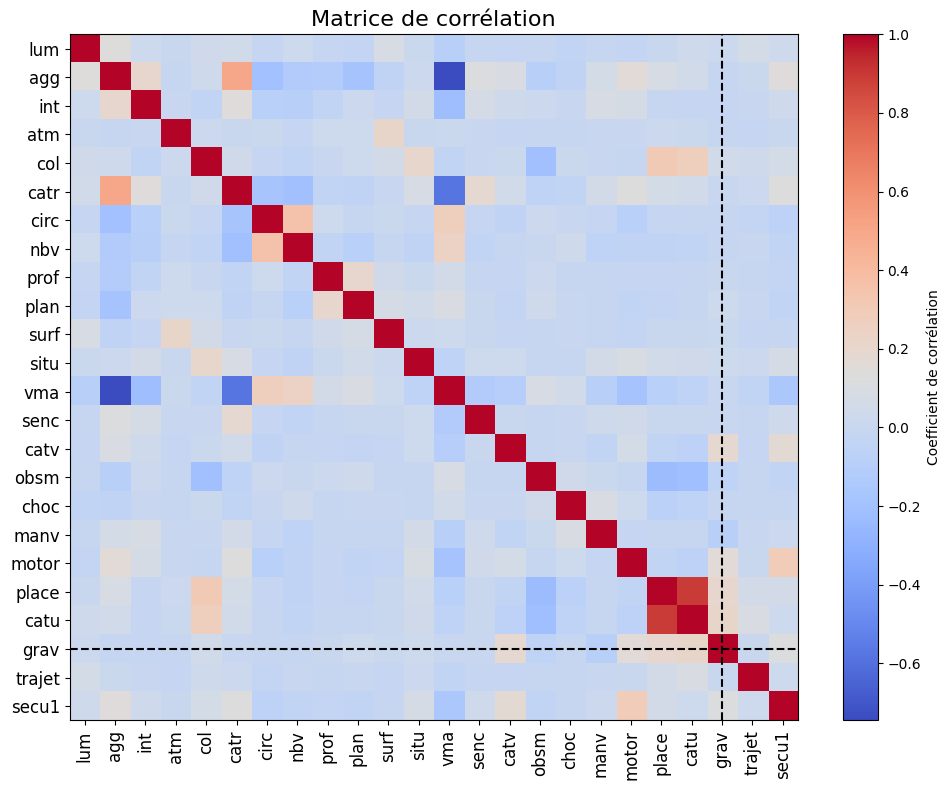

In [130]:
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, target_column=None):
    """
    Affiche la matrice de corrélation d'un DataFrame avec une mise en évidence optionnelle
    de la colonne cible.

    Args:
        df (pd.DataFrame): DataFrame contenant les données.
        target_column (str, optional): Nom de la colonne cible pour surligner les corrélations.
    """
    # Calcul de la matrice de corrélation
    correlation_matrix = df.corr()

    # Création de la figure
    plt.figure(figsize=(10, 8))
    plt.title("Matrice de corrélation", fontsize=16)

    # Affichage de la matrice sous forme de heatmap
    plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", aspect="auto")
    plt.colorbar(label="Coefficient de corrélation")

    # Ajout des ticks
    labels = correlation_matrix.columns
    plt.xticks(range(len(labels)), labels, rotation=90, fontsize=12)
    plt.yticks(range(len(labels)), labels, fontsize=12)

    # Mise en évidence de la colonne cible (facultatif)
    if target_column and target_column in correlation_matrix.columns:
        target_index = correlation_matrix.columns.get_loc(target_column)
        plt.axvline(x=target_index, color='black', linestyle='--', linewidth=1.5)
        plt.axhline(y=target_index, color='black', linestyle='--', linewidth=1.5)

    plt.tight_layout()
    plt.show()


# Appeler la fonction
plot_correlation_matrix(deduplicated_df, target_column='grav')


In [131]:
features_df, features_scores = processing.select_features_corr(df=deduplicated_df, target_column="grav", threshold=0.1)
processing.summary(features_df)

{'Total Columns': 6,
 'Total Rows': 150548,
 'Numerical Columns': ['catv', 'motor', 'place', 'catu', 'secu1', 'grav'],
 'Categorical Columns': [],
 'Missing Values': {'catv': 0,
  'motor': 0,
  'place': 0,
  'catu': 0,
  'secu1': 0,
  'grav': 0}}

In [132]:
features_df.grav.value_counts()

grav
1    64516
4    59835
3    22439
2     3758
Name: count, dtype: int64

In [133]:
features_scores

{'lum': 0.02502646781846006,
 'agg': -0.010711834349330351,
 'int': -0.019584345270113268,
 'atm': -0.0023986785040489562,
 'col': 0.054098761954096956,
 'catr': 0.00212374398261834,
 'circ': -0.005536685650870944,
 'nbv': -0.008638436668879068,
 'prof': 0.007862278394392819,
 'plan': 0.029415637125396753,
 'surf': 0.015586576041642304,
 'situ': 0.028166828339561484,
 'vma': 0.0005339363848133811,
 'senc': 0.001096070598123556,
 'catv': 0.18732329523236776,
 'obsm': -0.05465995579214901,
 'choc': -0.013693910775908385,
 'manv': -0.08689713109298813,
 'motor': 0.159016482736619,
 'place': 0.19991154806381034,
 'catu': 0.20957245206933306,
 'trajet': 0.009539210160300507,
 'secu1': 0.12053287076752825}

In [134]:
processing.summary(features_df)

{'Total Columns': 6,
 'Total Rows': 150548,
 'Numerical Columns': ['catv', 'motor', 'place', 'catu', 'secu1', 'grav'],
 'Categorical Columns': [],
 'Missing Values': {'catv': 0,
  'motor': 0,
  'place': 0,
  'catu': 0,
  'secu1': 0,
  'grav': 0}}

In [135]:
features_df.to_csv('../../dataset/preprocessed_data_v3.csv', index=False)

In [136]:
train_ds = pd.read_csv(f'{DATASET_PATH}/preprocessed_data_v3.csv')
X, y = train_ds.drop(columns=['grav']), train_ds['grav'] - 1

In [137]:
len(np.unique(y))

4

In [138]:
np.unique(y)

array([0, 1, 2, 3])